In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from water_pollution.data.preproc import *
from water_pollution.data import stations
from water_pollution.data import stations

from water_pollution.data import visu

In [4]:
# Builds the small training df (from saone data between 2011-2021)
file_path = '../../raw_data/pc_saone_2011_2021/Analyses.CSV'
rawdf = get_rawdf_from_file(file_path)
small_training_df = build_saone_base_training_data(rawdf)

# # Builds the big training df (from saone data between 1980-2021)
# file_path = '../../raw_data/nitrate_saone_1980_2021/Analyses.CSV'
# rawdf = get_rawdf_from_file(file_path)
# big_training_df = build_saone_base_training_data(rawdf)

In [5]:
stationsdf = stations.get_saone_stations_df()
stationsdf.sort_values('alt')

,id,label,alt,river_id,river_label,coord
30,6059550,SAONE A LYON 2,164,U---0000,La Saône,"(45.75657041475737, 4.825974154785283)"
11,6059500,SAONE A LYON 1,164,U---0000,La Saône,"(45.79653877103179, 4.831905651439411)"
3,6059000,SAONE A ROCHETAILLEE-SUR-SAONE,166,U---0000,La Saône,"(45.84864349291576, 4.834847298720306)"
23,6049600,SAONE A CRECHES-SUR-SAONE,168,U---0000,La Saône,"(46.24081158148317, 4.809090944105675)"
13,6050000,SAONE A THOISSEY,168,U---0000,La Saône,"(46.164871577317825, 4.789202760318571)"
29,6810010,SAONE A ST-SYMPHORIEN-D'ANCELLES,168,U---0000,La Saône,"(46.18787308946925, 4.780200879945488)"
21,6049500,SAONE A VARENNES-LES-MACON,170,U---0000,La Saône,"(46.269983242282656, 4.822237801641501)"
18,6045800,SAONE A FLEURVILLE,170,U---0000,La Saône,"(46.44779717625807, 4.896612600024577)"
0,6053800,SAONE A ST-BERNARD,170,U---0000,La Saône,"(45.94411368108925, 4.728940625602998)"
25,6038500,SAONE A CHALON-SUR-SAONE 2,173,U---0000,La Saône,"(46.75789822690075, 4.8651353970319)"


In [6]:
from tensorflow.keras import models, layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

2021-11-29 09:19:10.856027: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-29 09:19:10.856133: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
df = small_training_df.copy()

# TRAIN / TEST / VAL SPLIT

feature_cols = [
    'sin_doy',
    'cos_doy',
    # 'source_dist',
    # 'year'
]

# SAONE A APREMONT 1 kept for final validation
val_bool = df['station_id'] == 6005500
val_df = df[val_bool].sort_values('date')

learn_bool = df['station_id'] != 6005500
learn_df = df[learn_bool].sort_values('date')


X = learn_df[feature_cols]
y = learn_df['nitrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_val = val_df[feature_cols]
y_val = val_df['nitrate']

In [8]:
assert df.shape[0] == learn_df.shape[0] + val_df.shape[0]

In [9]:
assert X.shape[0] == X_train.shape[0] + X_test.shape[0]
assert y.shape[0] == y_train.shape[0] + y_test.shape[0]

In [10]:
# PREPROCESSING

# Fit on X_train
scaler = StandardScaler()
scaler.fit(X_train)

# Transform all the X
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
X_val_sc = scaler.transform(X_val)


In [11]:
def init_model(X):
    
    model = models.Sequential()
    
    model.add(layers.Dense(20,activation='relu',input_dim=X.shape[1]))
    model.add(layers.Dense(30,activation='relu'))
    model.add(layers.Dense(10,activation='relu'))
    
    model.add(layers.Dense(1,activation='linear'))
    
    return model

model = init_model(X)
model.compile(loss='mse', optimizer='adam')

es = EarlyStopping(
	patience=25,
	monitor='val_loss',
	restore_best_weights=True
)

history = model.fit(
	X_train_sc,y_train,
	epochs=1000,  # set it to a large value, early stoping will stop the fit
	batch_size=32, # good values : 16 or 32
	callbacks=[es],
	validation_data=(X_test, y_test),
	verbose=1
)

2021-11-29 09:19:23.265696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-29 09:19:23.265730: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-29 09:19:23.265813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2021-11-29 09:19:23.266131: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-29 09:19:23.508280: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimiz

Epoch 1/1000
38/38 [==============================] - 1s 5ms/step - loss: 97.0477 - val_loss: 90.2450
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 79.7209 - val_loss: 71.9326
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 47.0791 - val_loss: 37.1516
Epoch 4/1000
38/38 [==============================] - 0s 1ms/step - loss: 15.7312 - val_loss: 16.2287
Epoch 5/1000
38/38 [==============================] - 0s 1ms/step - loss: 11.3796 - val_loss: 16.2117
Epoch 6/1000
38/38 [==============================] - 0s 1ms/step - loss: 11.0305 - val_loss: 16.2039
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 10.8934 - val_loss: 16.1264
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 10.8020 - val_loss: 16.0211
Epoch 9/1000
38/38 [==============================] - 0s 2ms/step - loss: 10.7378 - val_loss: 16.0462
Epoch 10/1000
38/38 [==============================] - 0s 2ms/step - loss: 10.6925

In [12]:
def plot_loss(history, title=None):
    fig = plt.figure(figsize=(20,7))
    
    # --- LOSS --- 
    ax = plt.gca()
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title('Model loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylim((0,100))
    ax.legend(['Train', 'Test'], loc='best')
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

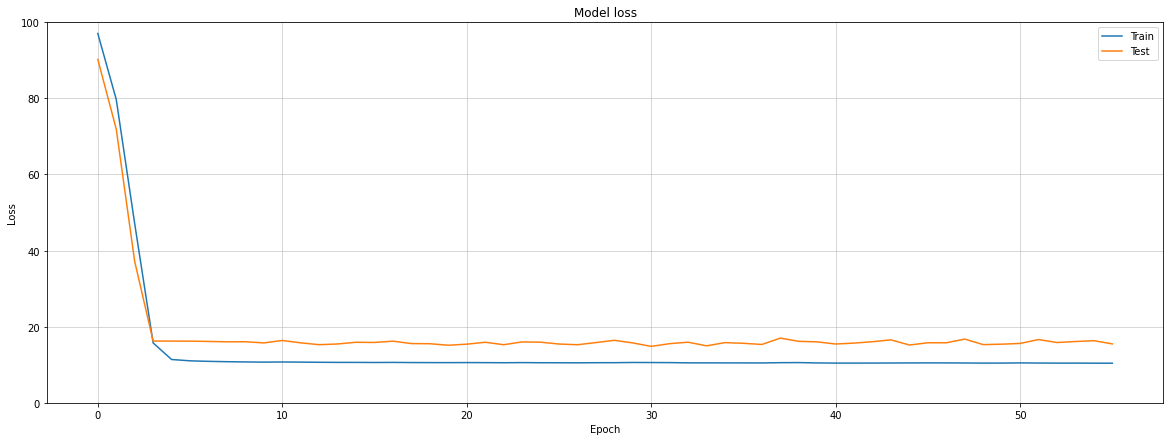

In [13]:
plot_loss(history)

In [14]:
# Prediction on Validation (Apremont)

y_pred = model.predict(X_val)

In [15]:
val_df['pred'] = y_pred

In [16]:
val_df

,date,year,sin_doy,cos_doy,station_id,source_dist,nitrate,pred
463,2011-12-07,2011,-0.417194,0.908818,6005500,91.076659,11.5,8.988233
464,2012-02-14,2012,0.687053,0.726608,6005500,91.076659,14.7,8.856977
465,2012-04-17,2012,0.963471,-0.267814,6005500,91.076659,8.9,8.556769
467,2012-05-31,2012,0.516062,-0.856551,6005500,91.076659,11.8,7.736319
466,2012-06-18,2012,0.230306,-0.973118,6005500,91.076659,10.9,7.325221
...,...,...,...,...,...,...,...,...
511,2021-06-17,2021,0.263665,-0.964614,6005500,91.076659,9.5,7.388206
512,2021-06-17,2021,0.263665,-0.964614,6005500,91.076659,9.5,7.388206
515,2021-06-24,2021,0.145799,-0.989314,6005500,91.076659,9.5,7.163966
516,2021-07-28,2021,-0.425000,-0.905193,6005500,91.076659,13.0,5.782014


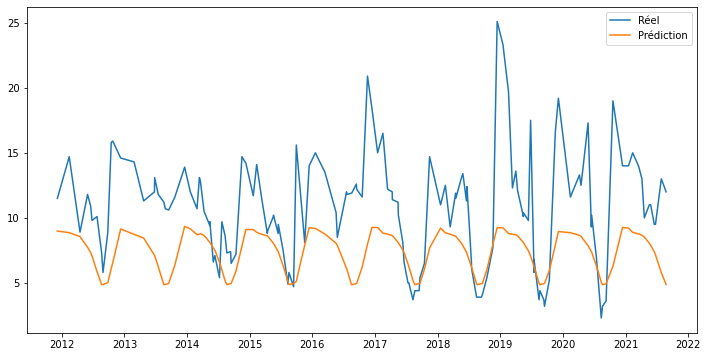

In [17]:
plt.figure(figsize=(12,6))
plt.plot(val_df['date'],val_df['nitrate'],label='Réel')
plt.plot(val_df['date'],val_df['pred'],label='Prédiction')
plt.legend()
plt.show()

In [ ]:
test_df